In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lzma as xz
import os

pd.options.display.max_rows = 100
%matplotlib inline

# Biopython Entrez
Provides code to access NCBI over the WWW.  

[Package info](https://biopython.org/DIST/docs/api/Bio.Entrez-module.html)

* `api_key` Personal API key from NCBI. If not set, only 3 queries per second are allowed. 10 queries per seconds otherwise with a valid API key.

### 1. Basics

In [2]:
from Bio import Entrez

In [3]:
from Bio import SeqIO

In [4]:
handle = Entrez.efetch(db="nucleotide", id="NC_045512",
                       rettype="gb", retmode="text")
handle.readline().strip()

'LOCUS       NC_045512              29903 bp ss-RNA     linear   VRL 18-JUL-2020'

### 2. Search via `esearch`

In [6]:
handle = Entrez.esearch(db="nucleotide", retmax=10, term="SARS-CoV-2", idtype="acc")
record = Entrez.read(handle)
handle.close()
print(record)

{'Count': '12266', 'RetMax': '10', 'RetStart': '0', 'IdList': ['NC_045512.2', 'NM_021804.3', 'NM_001371415.1', 'MT773134.1', 'MT773133.1', 'MT772580.1', 'MT772579.1', 'MT772578.1', 'MT772577.1', 'MT772576.1'], 'TranslationSet': [{'From': 'SARS-CoV-2', 'To': '"Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All Fields]'}], 'TranslationStack': [{'Term': '"Severe acute respiratory syndrome coronavirus 2"[Organism]', 'Field': 'Organism', 'Count': '11145', 'Explode': 'Y'}, {'Term': 'SARS-CoV-2[All Fields]', 'Field': 'All Fields', 'Count': '12266', 'Explode': 'N'}, 'OR', 'GROUP'], 'QueryTranslation': '"Severe acute respiratory syndrome coronavirus 2"[Organism] OR SARS-CoV-2[All Fields]'}


### 3. Method From `coronaversing`
To fetch the latest data from NCBI using keywords and a genome size range.

In [7]:
# data folders
root_folder = "./data/genbank/"
viruses = ["coronaviridae"]

# file periodically removed to update with the latest data
cache_vrs_file = ".cache_vrs.pkl" 
cache_cds_file = ".cache_cds.pkl" 
cache_regions_file = ".cache_regions.pkl" 

hidden_columns = ["sequence", "file_path", "strain", "collection_date"]
hidden_cds_columns = ["translation", "file_path", "location"]
hidden_regions_columns = ["id", "rna", "protein", "path"]

base_folder = "../data/genbank/"
# Entrez.email = 'dna-toolbox@gmail.com'

size_and_date = "(\"25000\"[SLEN] : \"35000\"[SLEN])"
genbank_search_query = {"coronaviridae": ["(\"Coronaviridae\"[Organism]) AND " + size_and_date]}

def fetch_gb(path, gid):
    handle = Entrez.efetch(db="nucleotide", id=gid, rettype="gb")
    local_file = open(path + "/" + gid + ".gb", 'w')
    local_file.write(handle.read())
    handle.close()
    local_file.close()

genome_files = genbank_search_query
viruses = genbank_search_query.keys()

In [11]:
count = 0
for vrs in viruses:
    
    data_folder = base_folder + vrs
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
    
    for keywords in genome_files[vrs]:
        handle = Entrez.esearch(db="nucleotide", retmax=5000, term=keywords, idtype="acc")
        record = Entrez.read(handle)
        ids = record["IdList"]
        print("[+] got", len(ids), "records")
        handle.close()

        for genbank_id in ids:
            file_name = data_folder + "/" + genbank_id + ".gb"
            count += 1
            if not os.path.exists(file_name):
                print("[+]  --- * fetching (", vrs, ")", file_name)
                downloaded = False
                tries = 0
                while not downloaded:
                    try:
                        fetch_gb(data_folder, genbank_id)
                        downloaded = True
                    except:
                        if tries == 5:
                            print("[+]  --- * couldn't get (", vrs, ")", genbank_id)
                            break
                        tries += 1
                        time.sleep(3)
                        pass

print("[+] Collected", count, " gb files")

[+] got 5000 records
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MN759311.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/NC_045512.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/NC_004718.3.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT773134.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT773133.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772580.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772579.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772578.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772577.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772576.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772575.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT77257

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772485.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772484.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772483.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772482.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772481.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772480.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772479.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772478.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772477.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772476.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772475.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772474.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT772085.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT766908.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT766907.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860655.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860654.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860653.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860652.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860651.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860650.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860649.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860648.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR860647.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764185.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764184.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764183.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764182.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764181.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764180.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764179.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764178.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764177.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764176.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764175.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT764174.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757080.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757079.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757078.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757077.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757076.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757075.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757074.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757073.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757072.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757071.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757070.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT757069.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755901.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755900.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755858.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755857.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755838.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755837.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755836.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755835.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755834.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755833.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755832.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT755831.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750448.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750447.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750446.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750445.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750444.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750443.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750442.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750441.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750440.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750439.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750438.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750437.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750348.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750347.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750346.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750345.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750344.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750343.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750342.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750341.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750340.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750339.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750338.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750337.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750117.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750116.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750115.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750114.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750113.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750112.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750111.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750110.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750109.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750108.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750107.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT750106.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745875.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745836.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745767.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745749.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745748.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745747.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745746.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745745.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745744.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745743.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745742.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745741.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745652.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745651.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745650.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745649.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745648.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745647.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745646.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745645.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745644.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745643.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745642.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT745641.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC565411.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC565410.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC565409.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC565408.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC565407.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824600.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824599.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824571.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824570.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824567.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824566.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824565.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824443.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824442.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824441.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824440.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824439.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824438.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824437.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824436.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824435.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824434.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824433.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824432.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824343.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824342.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824341.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824340.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824339.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824338.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824337.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824336.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824335.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824334.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824333.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824332.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824243.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824242.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824241.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824240.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824239.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824238.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824237.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824236.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824235.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824234.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824233.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824232.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824143.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824142.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824141.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824140.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824139.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824138.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824137.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824136.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824135.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824134.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824133.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824132.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824042.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824041.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824040.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824039.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824038.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824037.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR824035.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821976.4.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821979.4.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821999.3.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821986.3.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821992.3.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814009.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814007.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814006.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814005.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814023.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814022.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814021.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814020.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814111.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814003.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814184.2.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814193.2.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821892.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821891.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821890.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821889.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821878.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821877.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821876.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821855.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821843.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821874.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821873.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR821872.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814228.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814225.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814224.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814223.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814222.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814221.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814220.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814214.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814211.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814210.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814209.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LR814208.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740706.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740688.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740686.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740684.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740619.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740618.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740617.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740485.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740483.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740480.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740479.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT740478.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731936.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731935.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731934.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731933.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731932.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731931.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731764.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731746.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731744.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731743.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731742.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT731741.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706421.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706420.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706419.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706418.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706417.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706416.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706415.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706414.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706413.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706412.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706411.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706410.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706321.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706320.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706319.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706318.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706317.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706316.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706315.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706314.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706313.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706312.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706311.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706310.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706221.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706220.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706219.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706218.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706217.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706216.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706215.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706214.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706213.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706212.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706211.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT706210.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704112.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704111.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704110.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704109.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704108.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704107.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704106.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704105.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704104.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704103.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704102.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704101.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704012.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704011.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704010.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704009.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704008.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704007.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704006.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704005.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704004.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704003.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704002.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT704001.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683408.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683407.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683406.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683405.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683404.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683403.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683402.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683401.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683400.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683399.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683398.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT683397.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC556317.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC556316.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/LC556315.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676397.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676390.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676389.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676388.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676369.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676368.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676366.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676367.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT676291.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614598.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614597.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614596.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614595.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614357.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614356.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614349.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614348.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT614347.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT611968.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT611539.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT611538.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664118.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664117.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664109.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664107.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664106.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT664105.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT661524.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT658509.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT658508.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT658507.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT657958.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT657275.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612309.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612308.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612307.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612306.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612305.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612304.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612303.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612302.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612301.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612300.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612299.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612298.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612209.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612208.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612207.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612206.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612205.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612204.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612203.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612202.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612201.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612200.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612199.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612198.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612109.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612108.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT612107.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT007544.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT648676.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646120.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646119.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646118.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646117.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646116.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646115.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT646114.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642415.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642414.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642413.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642412.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642411.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642410.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642409.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642408.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642407.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642406.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642405.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642404.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642315.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642314.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642313.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642312.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642311.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642310.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642309.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642308.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642307.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642306.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642305.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642304.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642215.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642214.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642213.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642212.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642211.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642210.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642209.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642208.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642207.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642206.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642205.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642204.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642115.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642114.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642113.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642112.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642111.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642110.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642109.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642108.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642107.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642106.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642105.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT642104.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641729.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641728.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641727.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641726.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641725.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641724.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641723.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641722.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641721.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641720.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641719.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641718.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641617.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641616.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641615.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641656.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641614.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641613.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641612.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641611.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641655.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641610.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641609.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641608.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641529.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641528.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641527.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641526.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641525.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641524.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641523.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641522.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641521.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641520.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641519.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT641518.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635257.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635256.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635255.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635254.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635253.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635252.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635251.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635250.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635249.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635248.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635247.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT635246.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT633004.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT633003.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT633002.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT633001.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT633000.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632999.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632998.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632997.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632996.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632995.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632994.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632993.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632904.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632903.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632902.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632901.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632900.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632899.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632898.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632897.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632896.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632895.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632894.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632893.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632804.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632803.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632802.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632801.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632800.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632799.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632798.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632797.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632796.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632795.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632794.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632793.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632572.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632571.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632570.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632569.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632568.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632567.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632566.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632565.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632564.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632563.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632562.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT632561.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631827.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631826.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631825.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631824.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631823.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631822.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631821.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631820.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631819.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631818.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631817.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT631816.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628237.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628236.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628235.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628234.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628233.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628232.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628231.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628230.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628229.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628228.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628227.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628226.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628137.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628136.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628135.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628134.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628133.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628132.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628131.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628130.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628129.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628128.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628127.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628126.1.gb
[+]  --- * fetch

[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT628037.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627932.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627931.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627930.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627929.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627928.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627927.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627926.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627925.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627924.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627923.1.gb
[+]  --- * fetching ( coronaviridae ) ../data/genbank/coronaviridae/MT627922.1.gb
[+]  --- * fetch

[+] Collected 5000  gb files


In [29]:
from IPython.display import display, HTML
from IPython.display import Markdown as md
from IPython.core.display import Image

# data folders
root_folder = "../data/genbank/"
viruses = ["coronaviridae"]

# file periodically removed to update with the latest data
cache_vrs_file = ".cache_vrs.pkl" 
cache_cds_file = ".cache_cds.pkl" 
cache_regions_file = ".cache_regions.pkl" 

hidden_columns = ["sequence", "file_path", "strain", "collection_date"]
hidden_cds_columns = ["translation", "file_path", "location"]
hidden_regions_columns = ["id", "rna", "protein", "path"]

# GISAID data (not includided in the repo, you should add your own fasta file downloaded from the GISAID page)
gisaid_search_query = {"coronaviridae": ["./data/gisaid/"]}
gisaid_tokens_no_wa = 5
gisaid_tokens_no_host = 6
gisaid_tokens_with_host = 7

GENUS = ["deltacoronavirus", "gammacoronavirus", "alphacoronavirus", "betacoronavirus"]

def get_genomes():
    for vrs in viruses:    
        # define data frame structure for viruses
        feature_columns = ["country", "host", "strain", "collection_date"]
        sample_columns = ["id", "length", "date", "information", "description", 
                          "sequence", "file_path", "genus", "subgenus", "unknown"]
        total_columns = sample_columns + feature_columns
        vrs_frame = {i:list() for i in total_columns}

        # define data frame structure for CDS
        cds_feature_columns = ["protein_id", "product", "gene", "codon_start", "translation"]
        cds_sample_columns = ["oid", "type", "date", "file_path", "location", "start", 
                              "end", "length", "unknown"]
        cds_columns = cds_feature_columns + cds_sample_columns
        cds_frame = {i:list() for i in cds_columns}

        # loop over gb files
        data_folder = root_folder + vrs + "/"
        for filename in os.listdir(data_folder):
            if filename.endswith(".gb"): 
                for seq_record in SeqIO.parse(data_folder + filename, "genbank"):

                    # get genome sequence, under certain tolerance to unknown nucleotides
                    genome_sequence = seq_record.seq.upper()
                    
                    if not (seq_record.annotations['molecule_type'] == "RNA" or 
                            seq_record.annotations['molecule_type'] == "ss-RNA"):
                        continue 
                    
                    # get taxonomy
                    genus = "unknown"
                    subgenus = "unknown"
                    if "taxonomy" in seq_record.annotations:
                        taxonomy = seq_record.annotations["taxonomy"]
                        for i in range(0, len(taxonomy)):
                            if taxonomy[i].lower() in GENUS:
                                genus = taxonomy[i].lower()
                                if i + 1 < len(taxonomy):
                                    subgenus = taxonomy[i + 1].lower()
                                    if "unclassified" in subgenus:
                                        subgenus = "unknown"
                                    break
                        
                    # get several additional variables from genbank file featues (if available)
                    for ftrs in seq_record.features:
                        
                        # some metada of the sample
                        if ftrs.type == "source":                        
                            for var in feature_columns:                        
                                if var in ftrs.qualifiers:
                                    # sanitize country
                                    if var == "country":
                                        country = ftrs.qualifiers[var][0]
                                        country = country.split(":")[0]
                                        vrs_frame["country"].append(country.lower())
                                    # sanitize host
                                    elif var == "host":
                                        host = ftrs.qualifiers[var][0]
                                        host = host.split(";")[0]
                                        vrs_frame["host"].append(host.lower())
                                    else:
                                        vrs_frame[var].append(ftrs.qualifiers[var][0])
                                else:
                                    vrs_frame[var].append("unknown")

                        # collect cds data in a different dataframe
                        if "protein_id" in ftrs.qualifiers:                        
                            for var in cds_feature_columns:                        
                                if var in ftrs.qualifiers:
                                    if var == "gene":
                                        cds_frame[var].append(ftrs.qualifiers[var][0].upper())
                                    elif var == "product":
                                        cds_frame[var].append(ftrs.qualifiers[var][0].lower())
                                    else:
                                        cds_frame[var].append(ftrs.qualifiers[var][0])
                                else:
                                    cds_frame[var].append("unknown")

                            cds_frame["start"].append(ftrs.location.start)
                            cds_frame["end"].append(ftrs.location.end)
                            cds_frame["length"].append(len(ftrs.location))
                            cds_frame["location"].append(ftrs.location)
                            cds_frame["date"].append(seq_record.annotations["date"])

                            # cds data of the record
                            cds_frame["oid"].append(seq_record.id)
                            cds_frame["file_path"].append(data_folder + filename)
                            cds_frame["type"].append(ftrs.type)
                            
                            translation = cds_frame["translation"][-1]
                            unknown_fraction = float(translation.count("X")) / float(len(translation))
                            cds_frame["unknown"].append(unknown_fraction)

                    # compress virus genome to get an idea of the amount of information. 
                    info = 10000.0 / len(xz.compress(str(genome_sequence).encode('utf-8')))

                    # genome length
                    genome_length = len(genome_sequence)

                    # sample (virus) data
                    vrs_frame["id"].append(seq_record.id)
                    vrs_frame["date"].append(pd.to_datetime(seq_record.annotations["date"]))
                    vrs_frame["information"].append(info)
                    vrs_frame["length"].append(genome_length)
                    vrs_frame["sequence"].append(genome_sequence)
                    vrs_frame["file_path"].append(data_folder + filename)
                    vrs_frame["description"].append(seq_record.description)
                    
                    vrs_frame["genus"].append(genus)
                    vrs_frame["subgenus"].append(subgenus)

                    unknown_fraction = float(genome_sequence.count("N")) / float(len(genome_sequence))
                    vrs_frame["unknown"].append(unknown_fraction)
                    
            else:
                continue

        # GISAID data, in case is available locally
        for folder in gisaid_search_query[vrs]:
            data_folder = folder + vrs + "/"

            if not os.path.exists(data_folder):
                continue

            for filename in os.listdir(data_folder):
                full_path = data_folder + filename
                for record in SeqIO.parse(full_path, "fasta"):
                    genome_sequence = Seq(str(record.seq).upper().replace("-", "N"))

                    tokens = []
                    for i in record.description.split("/"):
                        tokens += i.split("|")
                    token_number = len(tokens)

                    host = "Homo Sapiens"
                    if token_number == gisaid_tokens_no_host:
                        strain = tokens[0]
                        country = tokens[1]
                        collection_date = tokens[3]
                        index = tokens[4]
                        date = tokens[5]
                    elif token_number == gisaid_tokens_with_host:
                        strain = tokens[0]
                        if any(x.isupper() for x in tokens[1]):
                            country = tokens[1]
                            host = tokens[2]
                        else:
                            host = tokens[1]
                            country = tokens[2]
                        collection_date = tokens[4]
                        index = tokens[5]
                        date = tokens[6]
                    elif token_number == gisaid_tokens_no_wa:
                        strain = tokens[0]
                        country = tokens[1]
                        collection_date = tokens[2]
                        index = tokens[3]
                        date = tokens[4]
                    else:
                        raise ValueError(record.description + " unexpected number of tokens")

                    # compress virus genome to get an idea of the amount of information. 
                    info = 10000.0 / len(xz.compress(str(genome_sequence).encode('utf-8')))

                    # genome length
                    genome_length = len(genome_sequence)

                    vrs_frame["country"].append(country.lower())
                    vrs_frame["host"].append(host.lower())
                    vrs_frame["strain"].append(strain)
                    vrs_frame["collection_date"].append(collection_date)

                    # sample (virus) data
                    vrs_frame["id"].append(index)
                    
                    # very weird stuff with GISAID dates
                    try:
                        submission_date = pd.to_datetime(date)
                    except:
                        dtoks = date.split("-")
                        date = dtoks[0] + "-" + str(int(dtoks[2])%2 + 1) + "-" + str(int(dtoks[1])%27 + 1)
                        submission_date = pd.to_datetime(date)

                    # more weird stuff with the date
                    if submission_date > datetime.date.today():
                        submission_date = datetime.date.today()
                    
                    vrs_frame["date"].append(submission_date)

                    vrs_frame["information"].append(info)
                    vrs_frame["length"].append(genome_length)
                    vrs_frame["sequence"].append(genome_sequence)
                    vrs_frame["file_path"].append(data_folder + filename)
                    vrs_frame["description"].append(record.description)
                    unknown_fraction = float(genome_sequence.count("N")) / float(len(genome_sequence))
                    vrs_frame["unknown"].append(unknown_fraction)

                    vrs_frame["genus"].append("unknown")
                    vrs_frame["subgenus"].append("unknown")
                    
    df = pd.DataFrame.from_dict(vrs_frame)
    cdf = pd.DataFrame.from_dict(cds_frame)

    return df, cdf

if os.path.isfile(cache_vrs_file):
    corona_orig = pd.read_pickle(cache_vrs_file)
    corona_cds = pd.read_pickle(cache_cds_file)
else:
    corona_orig, corona_cds = get_genomes()
    corona_orig.to_pickle(cache_vrs_file)
    corona_cds.to_pickle(cache_cds_file)

# set index
corona_orig = corona_orig.set_index("id")
corona_cds = corona_cds.set_index("protein_id")

# drop duplicates
corona_orig = corona_orig[~corona_orig.index.duplicated(keep='first')]
corona_cds = corona_cds[~corona_cds.index.duplicated(keep='first')]
       
print('shape:', corona_orig.shape)
display(HTML(corona_orig.drop(hidden_columns, axis=1).head().to_html()))
display(HTML(corona_cds.drop(hidden_cds_columns, axis=1).head().to_html()))


shape: (4024, 13)


,length,date,information,description,genus,subgenus,unknown,country,host
id,,,,,,,,,
LC556315.1,29890,2020-06-30,1.190476,"Severe acute respiratory syndrome coronavirus 2 TKYE65734_2020 genomic RNA, nearly complete genome",betacoronavirus,sarbecovirus,0.0,japan,homo sapiens
LC556316.1,29903,2020-06-30,1.191043,"Severe acute respiratory syndrome coronavirus 2 TKYE610419_2020 genomic RNA, complete genome",betacoronavirus,sarbecovirus,0.0,japan,homo sapiens
LC556317.1,29899,2020-06-30,1.191611,"Severe acute respiratory syndrome coronavirus 2 TKYE610497_2020 genomic RNA, nearly complete genome",betacoronavirus,sarbecovirus,0.0,japan,homo sapiens
LC556318.1,29891,2020-06-30,1.191611,"Severe acute respiratory syndrome coronavirus 2 TKYE610504_2020 genomic RNA, nearly complete genome",betacoronavirus,sarbecovirus,0.0,japan,homo sapiens
LC556319.1,29893,2020-06-30,1.189910,"Severe acute respiratory syndrome coronavirus 2 TKYE610510_2020 genomic RNA, nearly complete genome",betacoronavirus,sarbecovirus,0.0,japan,homo sapiens


,product,gene,codon_start,oid,type,date,start,end,length,unknown
protein_id,,,,,,,,,,
BCG67453.1,orf1ab polyprotein,ORF1AB,1,LC556315.1,CDS,30-JUN-2020,252,21542,21291,0.0
BCG67454.1,surface glycoprotein,S,1,LC556315.1,CDS,30-JUN-2020,21549,25371,3822,0.0
BCG67455.1,orf3a protein,ORF3A,1,LC556315.1,CDS,30-JUN-2020,25379,26207,828,0.0
BCG67456.1,envelope protein,E,1,LC556315.1,CDS,30-JUN-2020,26231,26459,228,0.0
BCG67457.1,membrane glycoprotein,M,1,LC556315.1,CDS,30-JUN-2020,26509,27178,669,0.0


In [26]:
corona_orig.head()

,length,date,information,description,sequence,file_path,genus,subgenus,unknown,country,host,strain,collection_date
id,,,,,,,,,,,,,
LC556315.1,29890,2020-06-30,1.190476,Severe acute respiratory syndrome coronavirus ...,"(A, C, C, T, T, C, C, C, A, G, G, T, A, A, C, ...",../data/genbank/coronaviridae/LC556315.1.gb,betacoronavirus,sarbecovirus,0.0,japan,homo sapiens,unknown,2020-04
LC556316.1,29903,2020-06-30,1.191043,Severe acute respiratory syndrome coronavirus ...,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",../data/genbank/coronaviridae/LC556316.1.gb,betacoronavirus,sarbecovirus,0.0,japan,homo sapiens,unknown,2020-04
LC556317.1,29899,2020-06-30,1.191611,Severe acute respiratory syndrome coronavirus ...,"(A, A, G, G, T, T, T, A, T, A, C, C, T, T, C, ...",../data/genbank/coronaviridae/LC556317.1.gb,betacoronavirus,sarbecovirus,0.0,japan,homo sapiens,unknown,2020-04
LC556318.1,29891,2020-06-30,1.191611,Severe acute respiratory syndrome coronavirus ...,"(T, A, C, C, T, T, C, C, C, A, G, G, T, A, A, ...",../data/genbank/coronaviridae/LC556318.1.gb,betacoronavirus,sarbecovirus,0.0,japan,homo sapiens,unknown,2020-04
LC556319.1,29893,2020-06-30,1.189910,Severe acute respiratory syndrome coronavirus ...,"(T, A, T, A, C, C, T, T, C, C, C, A, G, G, T, ...",../data/genbank/coronaviridae/LC556319.1.gb,betacoronavirus,sarbecovirus,0.0,japan,homo sapiens,unknown,2020-04


In [34]:
corona_orig.to_csv('../data/coronaverse.csv')

In [39]:
# Trim outliers
# Use 29k for min sequence length
corona = corona_orig[corona_orig["length"] > 28000]

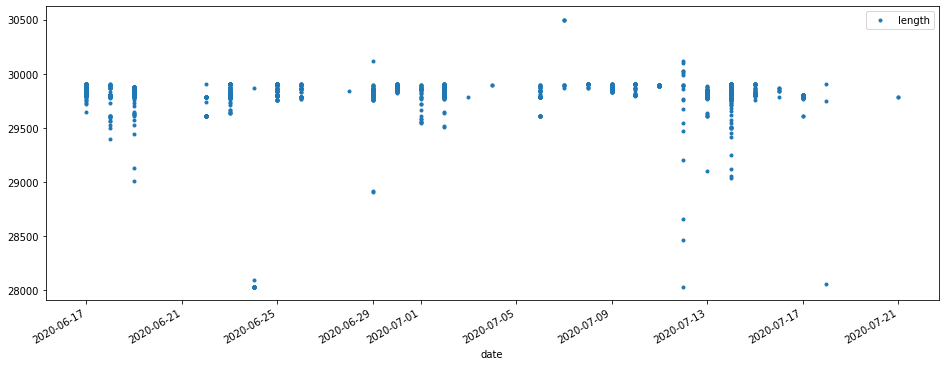

In [40]:
# Genome size over time
corona.plot(x="date", y=["length"], style='.', figsize=(16, 6));

In [60]:
# Display original novel coronavirus
corona[corona["collection_date"] == "Dec-2019"].head()

,length,date,information,description,sequence,file_path,genus,subgenus,unknown,country,host,strain,collection_date
id,,,,,,,,,,,,,
NC_045512.2,29903,2020-07-18,1.189343,Severe acute respiratory syndrome coronavirus ...,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",../data/genbank/coronaviridae/NC_045512.2.gb,betacoronavirus,sarbecovirus,0.0,china,homo sapiens,unknown,Dec-2019


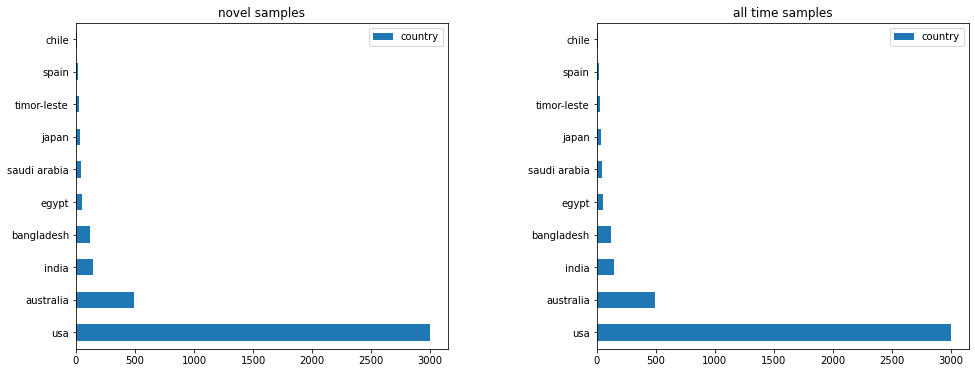

In [64]:
novel_corona = corona
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)

countries = pd.DataFrame(novel_corona["country"].value_counts())
countries = countries[countries.index != "unknown"]
countries.head(10).plot(kind = 'barh', ax=axes[0], title="novel samples");

countries = pd.DataFrame(corona["country"].value_counts())
countries = countries[countries.index != "unknown"]
countries.head(10).plot(kind = 'barh', ax=axes[1], title="all time samples");

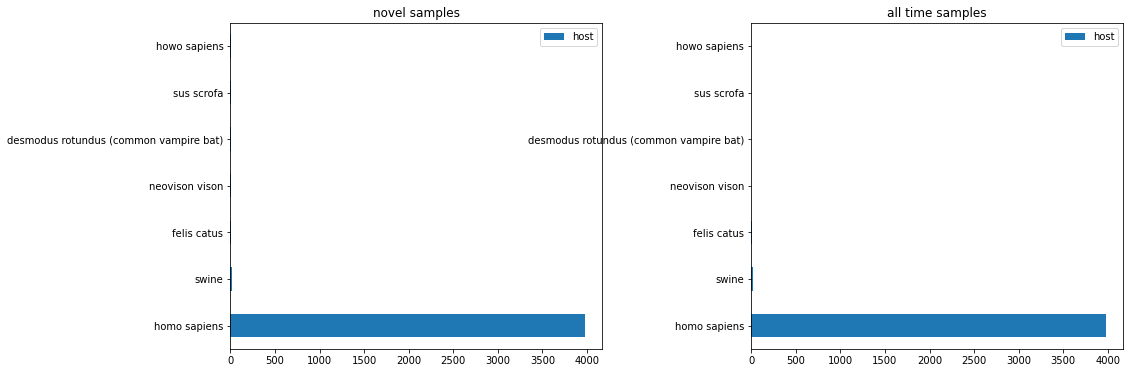

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)

hosts = pd.DataFrame(novel_corona["host"].value_counts())
hosts = hosts[hosts.index != "unknown"]
hosts.head(10).plot(kind = 'barh', ax=axes[0], title="novel samples");

hosts = pd.DataFrame(corona["host"].value_counts())
hosts = hosts[hosts.index != "unknown"]
hosts.head(10).plot(kind = 'barh', ax=axes[1], title="all time samples");

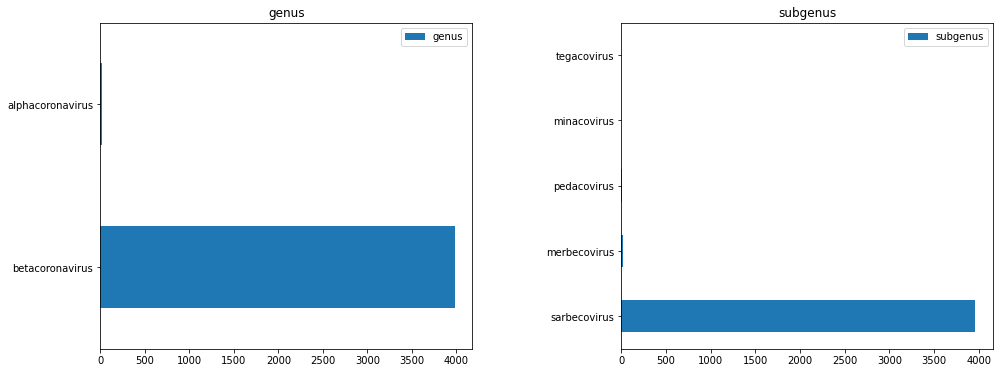

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)

genus = pd.DataFrame(corona["genus"].value_counts())
genus = genus[genus.index != "unknown"]
genus.head(10).plot(kind = 'barh', ax=axes[0], title="genus");

subgenus = pd.DataFrame(corona["subgenus"].value_counts())
subgenus = subgenus[subgenus.index != "unknown"]
subgenus.head(10).plot(kind = 'barh', ax=axes[1], title="subgenus");

In [ ]:
# Note: need to go back and download more as (n=5000) is not enough samples to pick up older sequences!